In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def scaling(X):
  #here in this algo we will use Z-score normalization
  m, n=X.shape
  for j in range(n):
    X[:,j]=(X[:,j]-np.mean(X[:,j]))/np.std(X[:,j])
  return X







In [3]:
def diff(w, b, X, Y, lamda):
  m,n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    err = (np.dot(X[i], w) + b) - Y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * X[i, j] + lamda*w[j]
    dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m


  return dj_dw, dj_db

In [4]:
def cost (w, b,X , Y, lamda):
  m,n =X.shape
  j=0
  for i in range(m):
    j=j+(np.dot(w,X[i])+b-Y[i])**2
  j=j/(2*m) + (lamda*np.dot(w,w))/(2*m)
  return j

In [5]:
def grad(w, b, X, Y,alpha, ittr, lamda):
  #alpha=0.1
  j=[]
  for i in range (ittr):
    df_dw, df_db=diff (w, b, X, Y, lamda )
    w=w-(alpha*df_dw)
    b=b-(alpha*df_db)
    j.append(cost(w,b, X, Y, lamda))
    if (i%100==0):
      print(f"The cost function after {i} itterations is {cost(w,b, X, Y, lamda)}")
  #print(w)
  #print(b)
  plt.plot(range(ittr), j)
  plt.xlabel('Number of Iterations')
  plt.ylabel('Cost (j)')
  plt.title('Cost vs. Iterations')
  plt.show()

  return w, b


In [6]:
def regression(X, Y, X_test,alpha, ittr, lamda):
  m, n= X.shape
  a, c= X_test.shape
  W=np.zeros(n)
  b=0

  w, b= grad(W, b, X, Y, alpha, ittr, lamda)

  predict=np.zeros(a)
  for i in range (a):
    predict[i]=np.dot(w, X_test[i, :])+b
  print (f"The predictions of each test case are {predict}")

  #print(f"W: {w} B : {b}")
  return predict, cost (w, b,X , Y, lamda)



In [7]:
def r2_score(y_true, y_pred):
  ss_res = np.sum((y_true - y_pred)**2)
  ss_tot = np.sum((y_true - np.mean(y_true))**2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [7]:
train= np.array(pd.read_csv("linear_regression_train.csv"))
test=np.array(pd.read_csv("linear_regression_test.csv"))

In [10]:
print(train.shape)
print(test.shape)

(48000, 27)
(12000, 26)


In [8]:
a, b= train.shape
c,d= test.shape

In [10]:
X=np.zeros([a,b-2])
Y=np.zeros(a)

for i in range (a):
  X[i]=train[i, 1:b-1]
  Y[i]=train[i,b-1]
#X_train=X_train.transpose()

temp=X

X= scaling(X)
print(X)
X_train=X
Y_train=Y

[[-1.69864257  0.25314326  1.13869653 ... -0.22286562 -0.47196937
   2.27252813]
 [ 0.67201663 -1.49897152 -2.0985691  ...  0.15226832  0.88583556
  -0.21087511]
 [ 0.17740114  0.78499939  0.00481211 ... -0.53771862 -0.41626433
   0.40224792]
 ...
 [ 0.81704195  1.17747749  0.99823079 ... -0.82105666 -1.01309748
   2.17589655]
 [-1.07691097 -0.1244421   0.41474601 ...  2.77345726  0.61758348
  -0.31658482]
 [-0.21901717 -0.87546677 -2.26766168 ...  0.228205   -2.83281419
   0.46684529]]


In [13]:
#Cell spliting Data into 20% cross validation and 80% train dataset.
m = X.shape[0]
ind = np.random.permutation(m)
spind = int(0.8 * m)

train_indices = ind[:spind]
val_indices = ind[spind:]


X_train = X[train_indices]
Y_train = Y[train_indices]
X_cv = X[val_indices]
Y_cv = Y[val_indices]




In [11]:
print(X_train)

[[-1.69864257  0.25314326  1.13869653 ... -0.22286562 -0.47196937
   2.27252813]
 [ 0.67201663 -1.49897152 -2.0985691  ...  0.15226832  0.88583556
  -0.21087511]
 [ 0.17740114  0.78499939  0.00481211 ... -0.53771862 -0.41626433
   0.40224792]
 ...
 [ 0.81704195  1.17747749  0.99823079 ... -0.82105666 -1.01309748
   2.17589655]
 [-1.07691097 -0.1244421   0.41474601 ...  2.77345726  0.61758348
  -0.31658482]
 [-0.21901717 -0.87546677 -2.26766168 ...  0.228205   -2.83281419
   0.46684529]]


In [12]:
print(Y_train)

[ 5235.69092808 -1221.44214589 -1102.75886179 ... -1703.21936555
  4551.70684165 -2800.86325604]


In [16]:
X_test=np.zeros([c,d-1])


for i in range (c):
  X_test[i]=test[i, 1:d]
X_test=scaling(X_test)
#X_test=X_test.transpose()
#X_test, temp= scaling(X_test)

In [17]:
print(X_test)

[[-1.97837849e+00  1.18957879e+00  1.21509022e+00 ...  1.14979205e+00
   2.96607097e-01 -1.54140275e+00]
 [ 8.00824125e-01  1.13374290e+00 -1.02510343e+00 ... -1.91574770e-01
   7.39848321e-01  1.38577932e+00]
 [-1.97421590e-02 -2.56490950e+00 -1.18184907e+00 ... -1.35180564e+00
  -1.81478789e-01  1.29622543e+00]
 ...
 [-1.21319079e+00 -1.44876427e+00  3.38105347e-02 ... -2.39698554e+00
   9.99369401e-01 -5.77312948e-01]
 [ 1.48863833e+00 -3.04328701e+00  1.41428403e+00 ... -1.26575430e-01
  -8.71643590e-01 -2.13875416e-01]
 [-1.50945651e-01  1.31117712e+00  5.15804967e-02 ...  2.51254572e-01
  -2.68407364e-03 -5.27269813e-01]]


In [19]:
lamda=0.01
ittr=500
alpha=0.1

The cost function after 0 itterations is 2527827.907256629
The cost function after 100 itterations is 58254.961558105206
The cost function after 200 itterations is 58253.8861552501
The cost function after 300 itterations is 58253.8861254973
The cost function after 400 itterations is 58253.886125496676


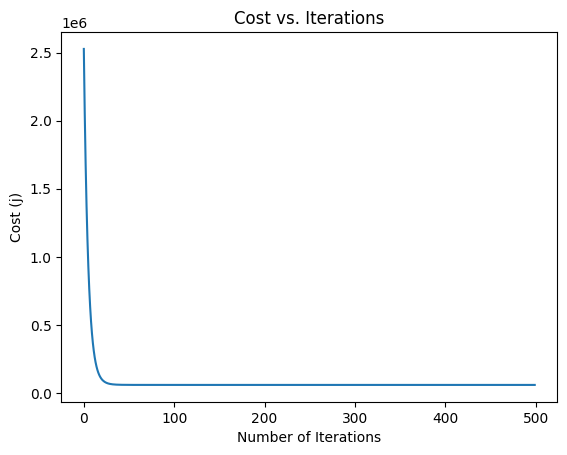

The predictions of each test case are [1108.22641927 4475.20011115 4058.86569636 ... 4963.09438205 -218.12499398
  584.88159299]
The cost after 500 itterations is: 58253.886125496676


In [20]:
preft, cos=regression(X_train, Y_train, X_test, alpha, ittr, lamda)
print(f"The cost after {ittr} itterations is: {cos}")

In [22]:
np.savetxt('Lineartestresults.csv', preft, delimiter=',')

In [34]:
r2=r2_score(Y_cv, preft)


In [36]:
mse = np.mean((Y_cv - preft) ** 2)
print(f"The cost after {ittr} itterations is: {cos}")
print(f"The Mean Squared Error of the Algo is: {mse}")
print(f"The R2 score of the Algo is: {r2}")

The cost after 500 itterations is: 58284.405964724596
The Mean Squared Error of the Algo is: 116714.33051249651
The R2 score of the Algo is: 0.9748054862401395
